# Double Pendulum

## Equations of motion
The equations of motion for a double pendulum are found by solving the lagrangian for theta 1 and theta 2

$U(\phi_1,\phi_2)=(m_1+m_2) g L_1 (1-\cos{\phi_1})+m_2 g L_2 (1-\cos{\phi_2})$ <br />
$T = 0.5 (m_1+m_2) L_1^2 \dot{\phi_1^2}+m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2} \cos{(\phi_1 - \phi_2)} + 0.5 m_2 L_2^2 \dot{\phi_2^2}$  <br />
$L = T - U$ <br />
$L = (m_1 + m_2) g L_1 (1- cos{\phi_1})+m_2 g L_2 (1-\cos{\phi_2}) -  0.5 (m_1+m_2) L_1^2 \dot{\phi_1^2}+m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2} \cos{(\phi_1 - \phi_2)} + 0.5 m_2 L_2^2 \dot{\phi_2^2}$  <br />

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

## Pendulum class and utility functions

In [3]:
class DoublePendulum():
    
    def __init__(self,L1,L2,m1,m2):
        """
        Initialization funciton that sets class parameters for length and mass, as well as setting up emtpy arrays
        for storing initial conditions and eqns of motion
        parameters: L1 (length of first pendulum), m1 (first mass), L2 (length of second pendulum), m2 (second mass)
        """
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = 9.806
        
        self.t_pts = []
        self.init_cond = []
        self.motion_eqs = []
        
        pass
    
    def dy_dt(self,t,y):
        """
        function that returns the righthand side of the differential equation
        parameters: t (array of times), y (array of theta1, z1, theta2, z2)
        """
        
        theta1, z1, theta2, z2 = y
        
        m = (self.m1 + self.m2)
        cosine = np.cos(theta1 - theta2)
        sine = np.sin(theta1 - theta2)
        g_sin1 = self.g * np.sin(theta1)
        g_sin2 = self.g * np.sin(theta2)
        
        denominator1 = self.L1 * (self.m1 + self.m2 * sine **2)
        denominator2 = self.L2 * (self.m1 + self.m2 * sine **2)
        
        z1_dot = (self.m2 * g_sin2 * cosine - self.m2 * sine * (self.L1 * z1**2 * cosine + self.L2 * z2**2) - m * g_sin1) / denominator1
        z2_dot = (m * (self.L1 * z1**2 * sine - g_sin2 + g_sin1 * cosine) + self.m2 * self.L2 * z2**2 * sine * cosine) / denominator2
        
        return z1, z1_dot, z2, z2_dot
    
    def solve_ode(self, initialcond, tpts):
        """
        function that solves the differential equation
        parameters: t (array of times), initialcond (initial conditions in form: theta1_0, theta1_0_dot, theta2_0, theta2_0_dot)
        """
        
        
        err = 1.0e-10
        theta10,theta10_dot,theta20,theta20_dot = initialcond
        self.init_cond = initialcond
        self.t_pts = t_pts
        
        sol = solve_ivp(fun = self.dy_dt, t_span = (t_start,t_end), y0 = initialcond, t_eval = tpts, atol = err, rtol = err)
                  
        theta1,theta1_dot,theta2,theta2_dot = sol.y
        self.motion_eqns = [theta1,theta1_dot,theta2,theta2_dot]
        
        return theta1,theta1_dot,theta2,theta2_dot
    
    def plot(self):
        """
        function to plot theta as a funtion of time (top left),
        theta_dot as a funtion of time (top right),
        theta1 as a function of theta2 (bottom left)
        phase plot for both parts of pendulum (bottom right)
        """
        t_start = t_pts[0]
        t_end = t_pts[-1]
        t_plot = np.linspace(t_start, t_end, len(theta1))
        figure = plt.figure(figsize = (15,15))
        ax1 = figure.add_subplot(2,2,1)
        ax1.plot(t_plot,theta1, color = 'red', label = 'pendulum 1')
        ax1.plot(t_plot,theta2, color = 'blue', label = 'pendulum 2')
        ax1.set_xlabel('time')
        ax1.set_ylabel('theta')
        ax1.legend()

        ax2 = figure.add_subplot(2,2,2)
        ax2.plot(t_plot,theta1_dot, color = 'red', label = 'pendulum 1')
        ax2.plot(t_plot,theta2_dot, color = 'blue', label = 'pendulum 2')
        ax2.set_xlabel('time')
        ax2.set_ylabel('d-theta/dt')
        ax2.legend()
        
        ax3 = figure.add_subplot(2,2,3)
        ax3.plot(theta1,theta2, color = 'red')
        ax3.set_xlabel('theta 1')
        ax3.set_ylabel('theta 2')
        
        ax4 = figure.add_subplot(2,2,4)
        ax4.plot(theta1,theta1_dot, color = 'red', label = 'pendulum 1')
        ax4.plot(theta2,theta2_dot, color = 'blue', label = 'pendulum 2')
        ax4.set_xlabel('theta')
        ax4.set_ylabel('d-theta/dt')
        ax4.legend()
        pass
    

# Within the Small Angle Approximation
Within the small angle approximation, a double pendulum will not exhibit chaotic behavior.

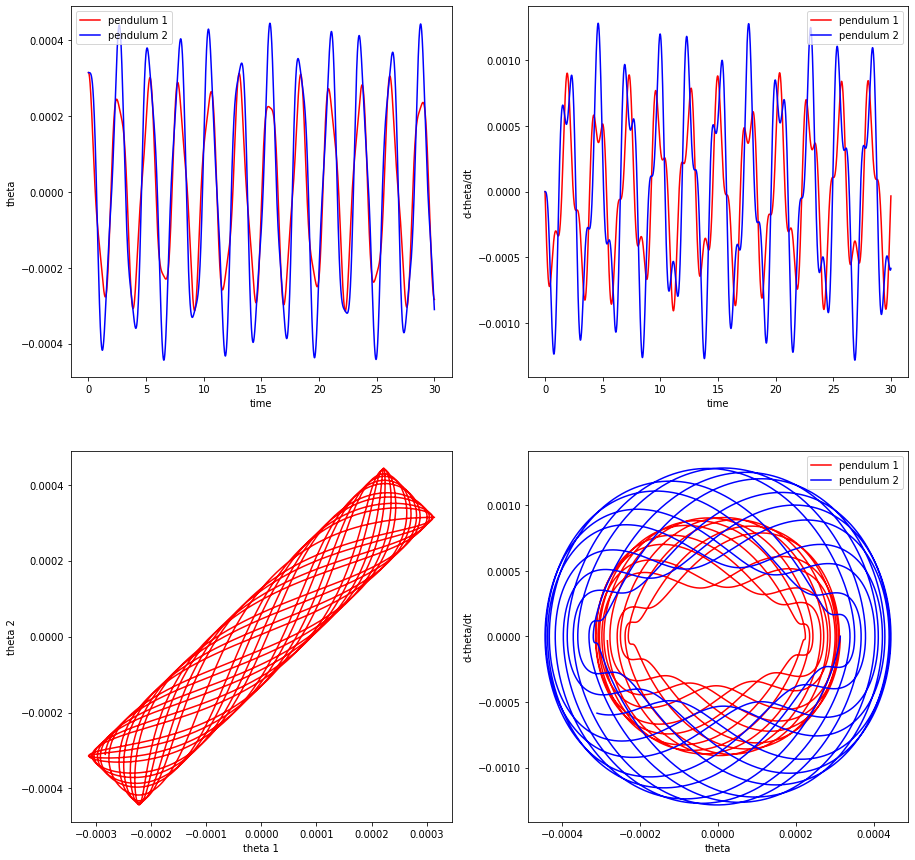

In [4]:
pend1 = DoublePendulum(1,1,1,1)
t_start = 0.
t_end = 30.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)
theta10 = 0.0001 * np.pi
theta10_dot = 0
theta20 = 0.0001 * np.pi
theta20_dot = 0
initialcond = [theta10, theta10_dot, theta20, theta20_dot]
theta1, theta1_dot, theta2, theta2_dot = pend1.solve_ode(initialcond,t_pts)
pend1.plot()

# Outside of the small angle approximation

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


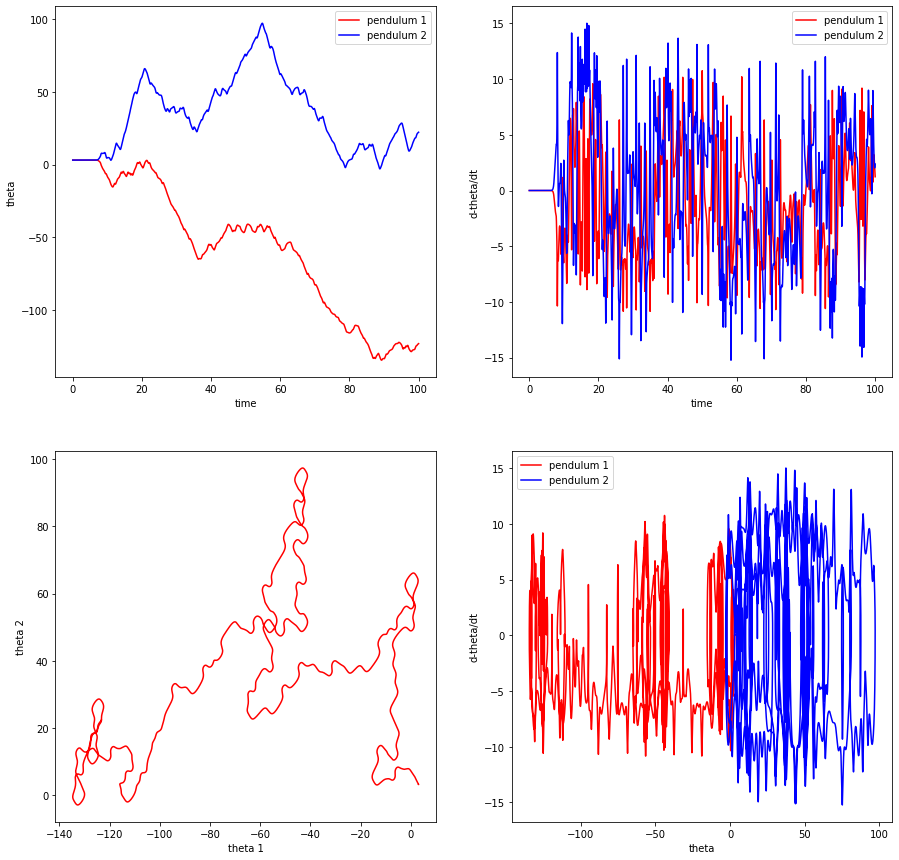

In [5]:
pend1 = DoublePendulum(1,1,1,1)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)
theta10 = 1 * np.pi
theta10_dot = 0
theta20 = 1 * np.pi
theta20_dot = 0
initialcond = [theta10, theta10_dot, theta20, theta20_dot]
theta1, theta1_dot, theta2, theta2_dot = pend1.solve_ode(initialcond,t_pts)
pend1.plot()

# Perturbation

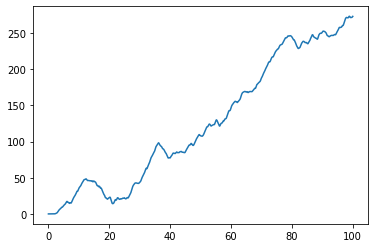

In [6]:
pend1 = DoublePendulum(1,1,1,1) #Create two copies of the same pendulum
pend2 = DoublePendulum(1,1,1,1)

perturbation = 0.00001

t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

theta10 = 1 * np.pi
theta10_dot = 0
theta20 = 1 * np.pi
theta20_dot = 0

theta10_pert = theta10 + perturbation
theta20_pert = theta20 + perturbation



initialcond1 = [theta10, theta10_dot, theta20, theta20_dot]
initialcond2 = [theta10_pert, theta10_dot, theta20_pert, theta20_dot]

theta1, theta1_dot, theta2, theta2_dot = pend1.solve_ode(initialcond1,t_pts)
theta1_pert, theta1_dot_pert, theta2_pert, theta2_dot_pert = pend2.solve_ode(initialcond2,t_pts)

difference = abs(theta1 - theta1_pert)

plt.plot(t_pts, difference)

Despite the intial conditions being different by a factor of 1e-5, the difference in angle between the first pendulum and the second continiues to diverge as t goes to infinity, this sensativity to initial conditions is a good sign of chaotic behavior.